In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import pandas as pd
from scipy.constants import c, h, e
from scipy.signal import find_peaks
from scipy.integrate import simpson
import PD_spectra as spectra

In [2]:
dir_bilayers = r'Measurements2025_01_14/'
dir_monolayer = r'Measurements2025_01_15/'
dir_monolayer2 = r'Measurements2025_01_17/'

power_coef = 11*0.5*1e3         #Estimation of the power in the sample

background_bilayers = np.loadtxt(dir_bilayers+'Background_2_s_101328.dat')
background_monolayer = np.loadtxt(dir_monolayer+'Background_2_s_101117.dat')
background_monolayer2 = np.loadtxt(dir_monolayer2+'Background_1_s_105736.dat')

x_axis_nm = np.loadtxt('calibration_x_axis.txt')
x_axis_eV = (h*c) / (x_axis_nm*1e-9) / e

sup_bly = spectra.PD_spectra("Supported bilayer", dir_bilayers+'172200', background_bilayers, 2000, x_axis_eV, power_coef, reversibility=True)
sup_bly_2 = spectra.PD_spectra("Supported bilayer 2", dir_bilayers+'153154', background_bilayers, 2000, x_axis_eV, power_coef, reversibility=True)#This is not actually supported
sus_bly_1 = spectra.PD_spectra("Suspended bilayer 1", dir_bilayers+'154359', background_bilayers, 2000, x_axis_eV, power_coef, reversibility=True)
sus_bly_2 = spectra.PD_spectra("Suspended bilayer 2", dir_bilayers+'155338', background_bilayers, 2000, x_axis_eV, power_coef, reversibility=True)
sup_mly = spectra.PD_spectra("Supported monolayer", dir_monolayer+'143608', background_monolayer, 2000, x_axis_eV, power_coef, reversibility=True)
sus_mly = spectra.PD_spectra("Suspended monolayer", dir_monolayer2+'152946', background_monolayer2, 1000, x_axis_eV, power_coef, reversibility=True)

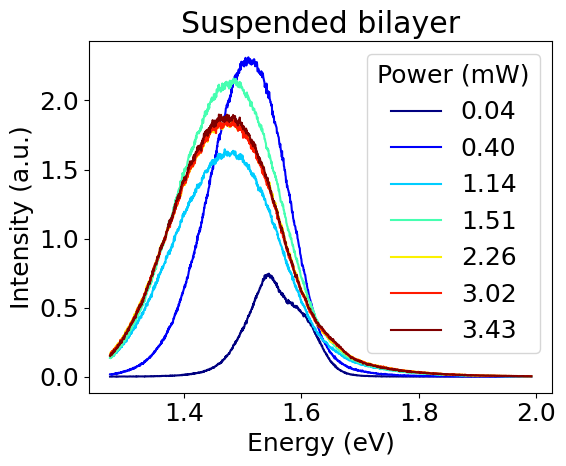

In [36]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(6,5))
norm = plt.Normalize(min(sus_bly_1.powers), max(sus_bly_1.powers))
color_map = plt.cm.jet
half = len(sus_bly_1.spectra)//2
indices_to_plot = [0, 1, 3, 4, 6, 8, 9]
spectra_to_plot = sus_bly_1.spectra[indices_to_plot]
powers_to_plot = sus_bly_1.powers[indices_to_plot]

for ii in range(len(spectra_to_plot)):
    clr = color_map(norm(powers_to_plot[ii]))
    plt.plot(sus_bly_1.x_axis, (spectra_to_plot[ii] - sus_bly_1.background) / (sus_bly_1.acquisition_time * 1e1) 
             , label=f'{powers_to_plot[ii]:.2f}', color=clr)

plt.legend(title=r'Power (mW)')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.title('Suspended bilayer')
plt.tight_layout()
plt.show()

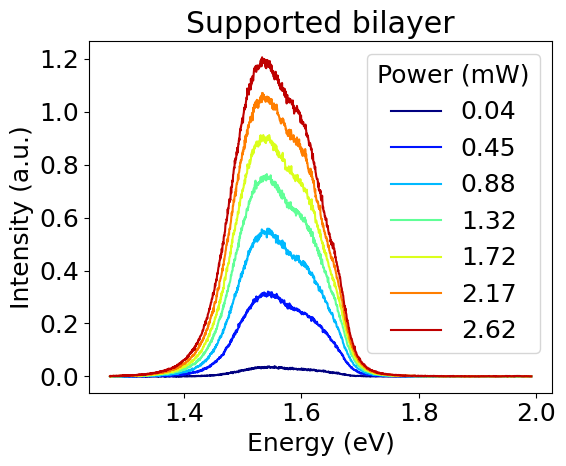

In [37]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(6,5))
norm = plt.Normalize(min(sup_bly.powers), max(sup_bly.powers))
color_map = plt.cm.jet
half = len(sup_bly.spectra)//2

spectra_to_plot = sup_bly.spectra[:half:3]
powers_to_plot = sup_bly.powers[:half:3]

for ii in range(len(spectra_to_plot)):
    clr = color_map(norm(powers_to_plot[ii]))
    plt.plot(sup_bly.x_axis, (spectra_to_plot[ii] - sup_bly.background) / (sup_bly.acquisition_time*10) 
             , label=f'{powers_to_plot[ii]:.2f}', color=clr)

plt.legend(title=r'Power (mW)', ncol=1)
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.title('Supported bilayer')
plt.tight_layout()
plt.show()

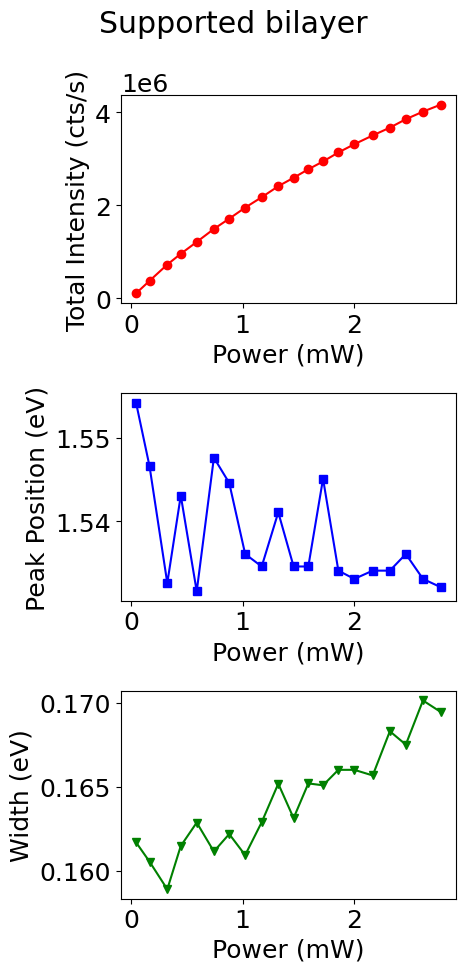

In [21]:
spectra.PD_spectra.plot_all_spectral_properties(sup_bly, mode='ascending', title='Supported bilayer', filename=None, font_size=18, fig_size=(5,10), y_labels=['Total Intensity (cts/s)', 'Peak Position (eV)', 'Width (eV)'], x_label='Power (mW)', join_points=True,
                                                add_legend=False)